<a href="https://colab.research.google.com/github/MasroorFahim/demo/blob/main/House_Price_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural net model
from keras.models import Sequential # this create a linear stack of neural network layers.
from keras.layers import Dense, Dropout # is a module that provides various layer types, including Dense and Dropout, used to define the architecture of the neural network.
from keras.callbacks import EarlyStopping # callback is used to monitor the validation loss during training. If the validation loss stops improving for a specified number of epochs (in this case, 10), training is stopped early. This helps prevent overfitting
from keras.optimizers import Adam

# Read in the data


In [4]:
df = pd.read_csv('housingdataset.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Preprocessing and cleaning

Seeing, what is the column names of the dataset

In [5]:
df.info()
print(df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value' 'ocean_proximity']


In [6]:
df.tail

<bound method NDFrame.tail of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

Checking the null values of the columns and we can see there are some missing values in the total_bedroom column

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dropping the rows of the missing column

In [8]:
# drop rows with missing values
df.dropna(axis=0, inplace=True)

checking the distribution of numerical feature values across the samples.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


In [15]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN":0,"INLAND":1,"NEAR OCEAN":2,"NEAR BAY":3,"ISLAND":4})

Variance Threshold checking to see if there's any non constant features.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

x = df.drop(['ocean_proximity'], axis=1)
y = df['ocean_proximity']

# Create the stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()
### Finding non constant features
sum(var_thres.get_support())

9

In [ ]:
df.shape

(20433, 10)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


**Exploratory Data Analysis**



Analyse the dataset using Pearson correlation matrix and others

<Axes: title={'center': 'Pearson Correlation Matrix'}>

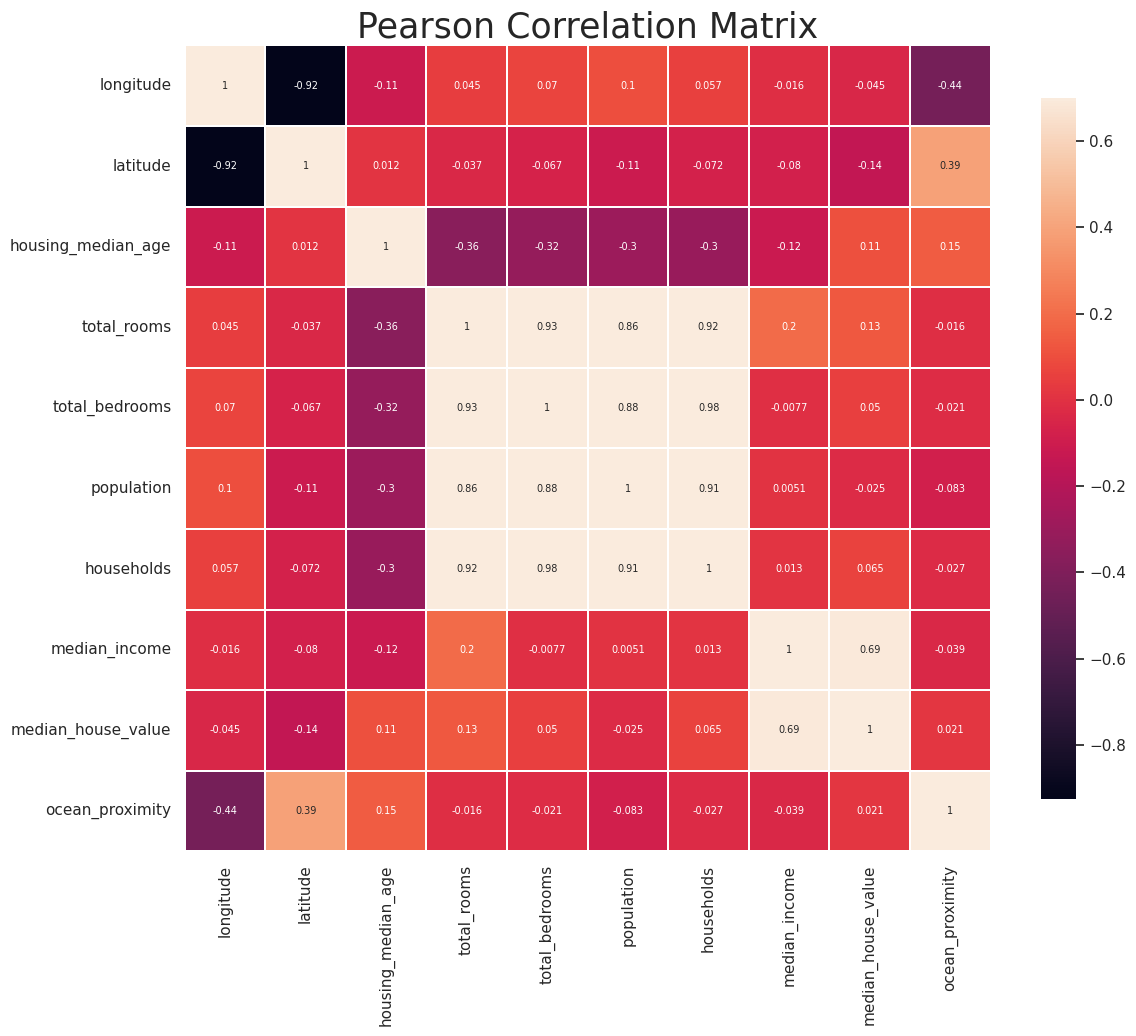

In [ ]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

as we are predicting out the house prices, the target variable will be the "median_house_value" as it shows the prices of the houses.

In [ ]:
price_corr = df.corr()['median_house_value'].sort_values(ascending=False)
print(price_corr)


median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ocean_proximity       0.020952
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


Most of the house prices ranges from 14999 to 500001 dollars.
The average house price is $180,000.

Keep in mind that it may be a good idea to drop extreme values. For instance, we could focus on house from $14999 to \$5,000,01 and drop the other ones.

It seems that there is a positive linear relationship between the
median_house_value with median_income

An increase in median come generally corresponds to an increase in house price.

<ipython-input-181-0a19314bcd7c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'], ax=axes[0])


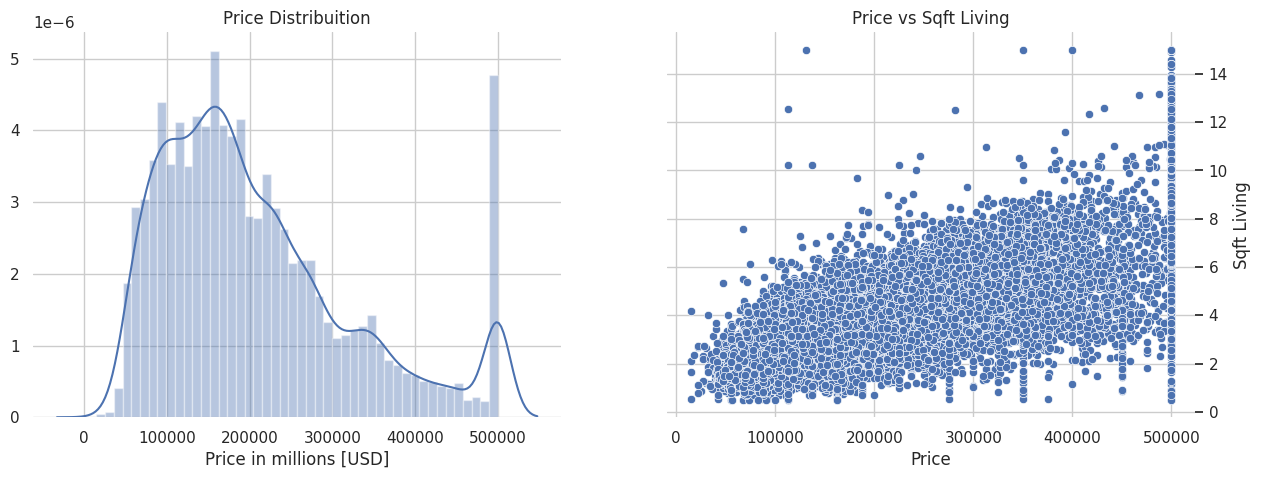

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.scatterplot(x='median_house_value',y='median_income', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

total_Bedrooms and total_rooms box plots to check the columns visually with respect to median_income to see the data

[Text(0.5, 0, 'Total_rooms'),
 Text(0, 0.5, 'median_house_value'),
 Text(0.5, 1.0, ' Total_Rooms vs House_value Box Plot')]

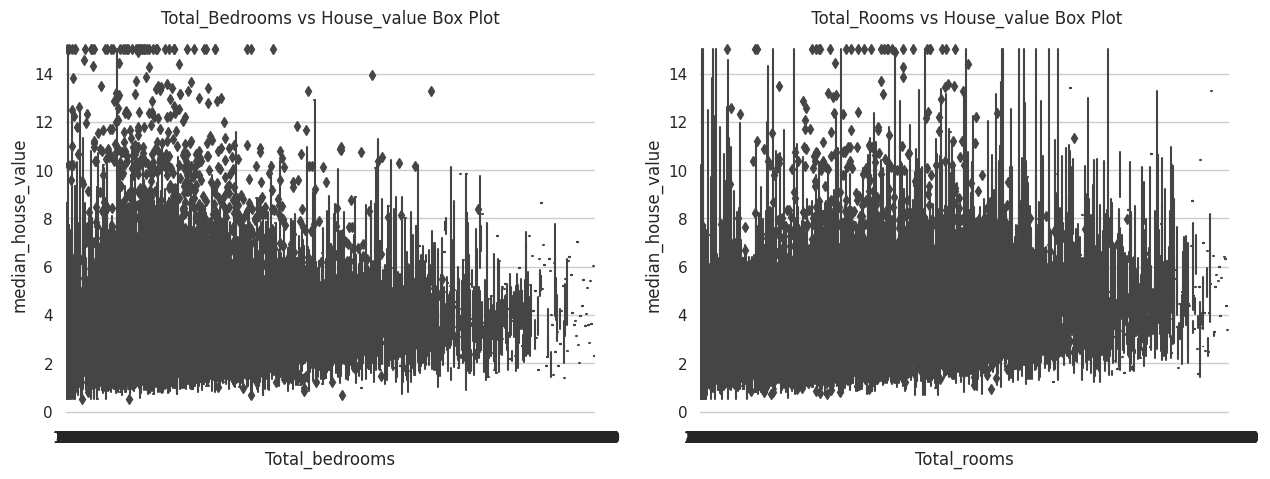

In [ ]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['total_bedrooms'],y=df['median_income'], ax=axes[0])
sns.boxplot(x=df['total_rooms'],y=df['median_income'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Total_bedrooms', ylabel='median_house_value', title='Total_Bedrooms vs House_value Box Plot')
axes[1].set(xlabel='Total_rooms', ylabel='median_house_value', title=' Total_Rooms vs House_value Box Plot')

observing

[Text(0.5, 0, 'Ocean_proximity'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'ocean_proximity vs Price Box Plot')]

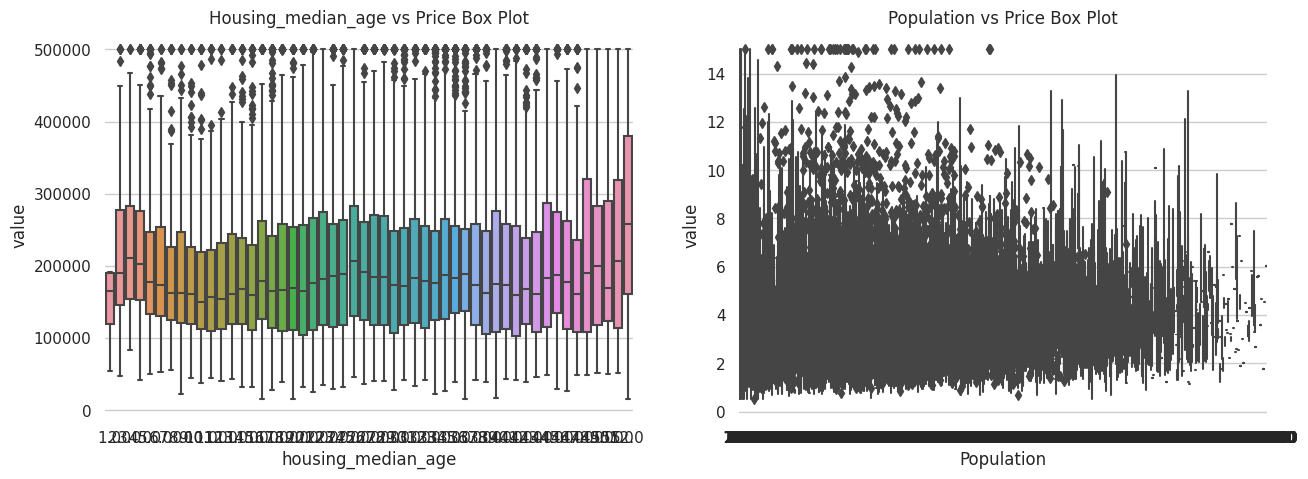

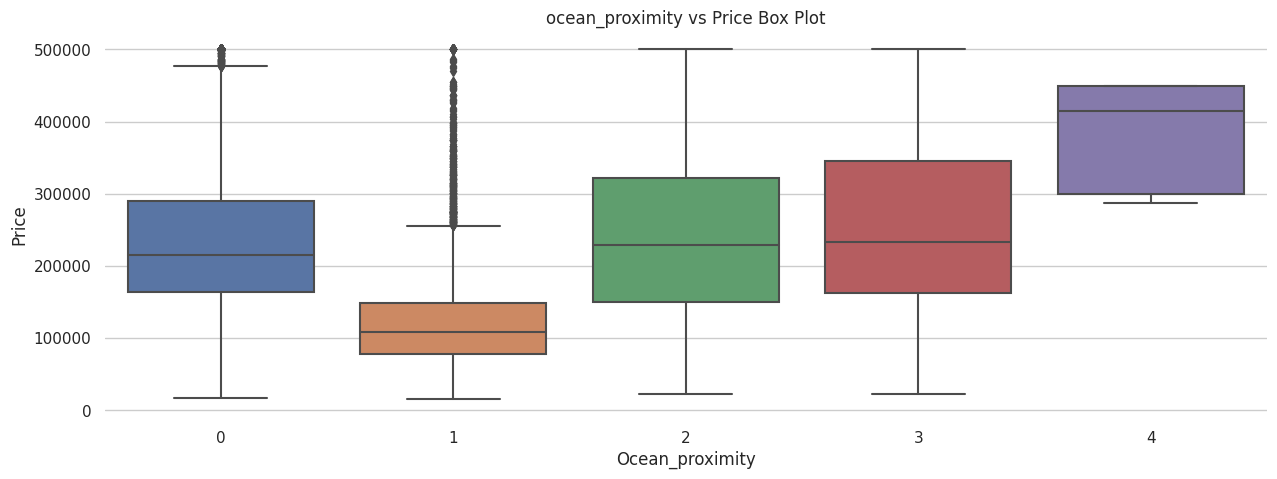

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['housing_median_age'],y=df['median_house_value'], ax=axes[0])
sns.boxplot(x=df['population'],y=df['median_income'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='housing_median_age', ylabel='value', title='Housing_median_age vs Price Box Plot')
axes[1].set(xlabel='Population', ylabel='value', title='Population vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['ocean_proximity'],y=df['median_house_value'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel= 'Ocean_proximity', ylabel='Price', title='ocean_proximity vs Price Box Plot')

In [ ]:

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


# Train test split

# Scaling/Minmax Scaling and normalization

In [17]:
# Target variable is 'median_house_value'
y = df['median_house_value']
x = df.drop('median_house_value', axis=1)
print(x.shape)
print(y.shape)

(20433, 9)
(20433,)


In [18]:
# convert to numpy array
x = np.array(x)
y = np.array(y)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


In [20]:
# Use MinMax scaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

Everything is scalled between 0 and 1

In [21]:

# everything has been scaled between 1 and 0
print('Max: ',x_train.max())
print('Min: ', x_train.min())

Max:  1.0000000000000002
Min:  0.0


In [ ]:
x_train.shape[1]

9

# Building  model (ANN)

In [22]:
model = Sequential([
    #input layer
    Dense(1000, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.2),
    #two hidden layers
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(250, activation='relu'),
    #output layer
    Dense(1,activation='linear') # here 1 shows countinuous value(regression)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              10000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 636001 (2.43 MB)
Trainable params: 636001 

Total Parameters: The "Total params" section indicates that the model has a total of 636,001 parameters. These are the weights and biases that the model will learn during training.

Trainable Parameters: The "Trainable params" section shows that all 636,001 parameters in the model are trainable, meaning they will be updated and adjusted during training to optimize the model's performance.

Non-trainable Parameters: The "Non-trainable params" section is typically 0, which means there are no parameters that won't be updated during training.

In [23]:
# Compile the model and it was set at earlystoping
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss',mode='min',patience=50, restore_best_weights=True)

In [24]:
# fit the model (training)
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), callbacks=[es], epochs=10, batch_size=50, verbose=1)

Epoch 1/10
327/327 [==============================] - 5s 13ms/step - loss: 24617697280.0000 - mae: 120347.4766 - val_loss: 10562238464.0000 - val_mae: 83025.6406
Epoch 2/10
327/327 [==============================] - 7s 22ms/step - loss: 9195523072.0000 - mae: 75953.7109 - val_loss: 6718464000.0000 - val_mae: 64052.9961
Epoch 3/10
327/327 [==============================] - 8s 25ms/step - loss: 6315437056.0000 - mae: 59627.5352 - val_loss: 5658739712.0000 - val_mae: 54834.2969
Epoch 4/10
327/327 [==============================] - 9s 27ms/step - loss: 5906161152.0000 - mae: 56442.0234 - val_loss: 5438416384.0000 - val_mae: 54327.4375
Epoch 5/10
327/327 [==============================] - 5s 16ms/step - loss: 5709689344.0000 - mae: 55130.7969 - val_loss: 5267479040.0000 - val_mae: 53352.2148
Epoch 6/10
327/327 [==============================] - 5s 16ms/step - loss: 5550099456.0000 - mae: 54211.6172 - val_loss: 5104654848.0000 - val_mae: 51968.9609
Epoch 7/10
327/327 [=======================

# Metrics and Score

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,explained_variance_score

y_pred = model.predict(x_test)
print("Mean_absolute_error score of the test data :", mean_absolute_error(y_test,y_pred))
print("Mean_squared_error score of the test data :", mean_squared_error(y_test,y_pred))
print("Mean_squared_log_error score of the test data :", mean_squared_log_error(y_test,y_pred))
print("R2_score of the test data :", r2_score(y_test,y_pred))
print('Variance Regression Score: ',explained_variance_score(y_test,y_pred))


128/128 [==============================] - 0s 2ms/step
Mean_absolute_error score of the test data : 48746.30188708099
Mean_squared_error score of the test data : 4554672703.7079115
Mean_squared_log_error score of the test data : 0.11223642992268695
R2_score of the test data : 0.6447722782255674
Variance Regression Score:  0.6457020275956328


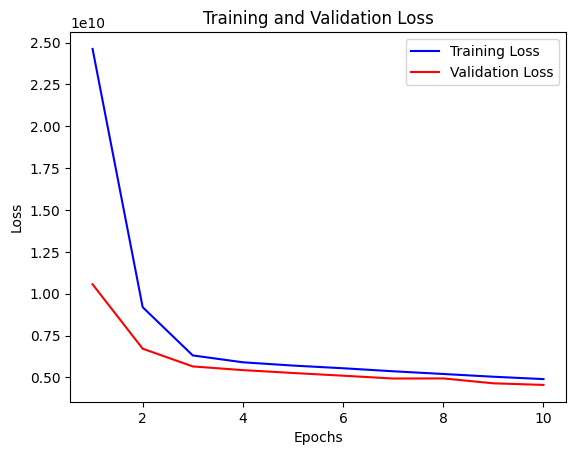

In [26]:
# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)
# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

128/128 [==============================] - 0s 3ms/step


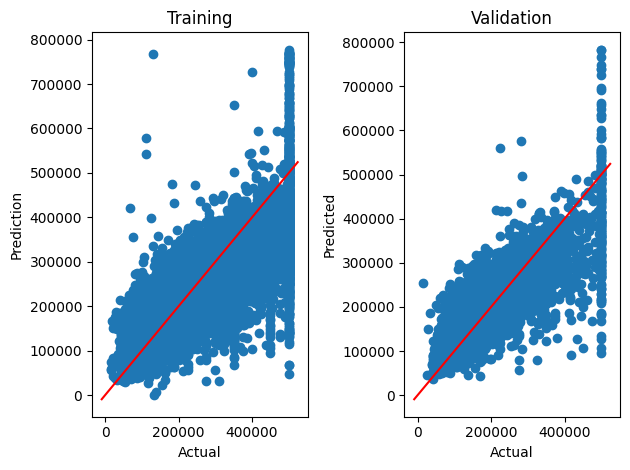

In [29]:
# Specify the dimensions
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Predicted', fontsize=10)
axes[1].set_title('Validation')

# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()
plt.show()


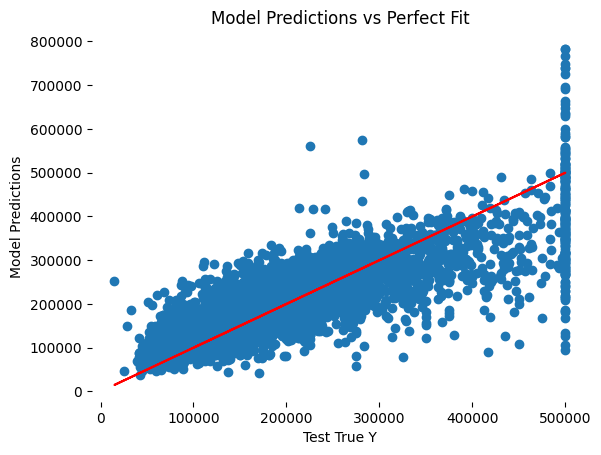

In [30]:


# Our model predictions
plt.scatter(y_test,y_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

sns.despine(left=True, bottom=True)
plt.title('Model Predictions vs Perfect Fit')
plt.xlabel('Test True Y')
plt.ylabel('Model Predictions')

# Show the plot
plt.show()


# Predictive System

In [31]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    features = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    features_scaled = min_max_scaler.fit_transform([features])
    results = model.predict(features_scaled).reshape(1,-1)
    return results[0]

In [39]:
longitude = 122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 880.0000
total_bedrooms   =  129.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 [==============================] - 0s 44ms/step


In [41]:
price

array([277056.9], dtype=float32)